In [1]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("viridis", 10)
sns.set_palette('muted')

导入数据

In [2]:
# 导入数据

data = pd.read_excel("data.xlsx")
data

Time  index_A  index_B  index_C  index_D  \
0    2022-01-25 00:50:00    78.31    23.66    12.24    17.81   
1    2022-01-25 01:50:00    78.46    23.88    12.41    17.99   
2    2022-01-25 02:50:00    79.08    23.52    12.41    17.86   
3    2022-01-25 03:50:00    79.29    22.94    11.72    17.86   
4    2022-01-25 04:50:00    79.95    21.42    10.68    17.63   
...                  ...      ...      ...      ...      ...   
1648 2022-04-07 19:50:00    79.82    23.84    11.03    13.52   
1649 2022-04-07 20:50:00    78.98    25.36    11.37    12.85   
1650 2022-04-07 21:50:00    78.86    25.40    11.37    11.42   
1651 2022-04-07 22:50:00    79.10    25.58    11.37    11.55   
1652 2022-04-07 23:50:00    79.32    24.82    11.03    11.55   

      Temperature_of_system1  Temperature_of_system2  Mineral_parameter1  \
0                1343.879322              949.674915               55.26   
1                1273.313000              937.436333               55.26   
2                1273.320333              937.405000               55.26   
3                1273.317500              937.401333               55.26   
4                1273.148333              937.256667               55.26   
...                      ...                     ...                 ...   
1648              495.109833              557.570833               54.40   
1649              495.076000              571.479667               54.40   
1650              494.801333              571.781000               54.40   
1651              495.090167              571.744333               54.40   
1652              434.989333              540.514333               54.40   

      Mineral_parameter2  Mineral_parameter3  Mineral_parameter4  \
0                 108.03               43.29               20.92   
1                 108.03               43.29               20.92   
2                 108.03               43.29               20.92   
3                 108.03               43.29               20.92   
4                 108.03               43.29               20.92   
...                  ...                 ...                 ...   
1648              105.14               49.03               20.82   
1649              105.14               49.03               20.82   
1650              105.14               49.03               20.82   
1651              105.14               49.03               20.82   
1652              105.14               49.03               20.82   

      Process_parameter1  Process_parameter2  Process_parameter3  \
0                   1.25                3.09              226.16   
1                   1.25                3.09              226.16   
2                   1.25                3.09              226.16   
3                   1.25                3.09              242.44   
4                   1.25                3.09              242.44   
...                  ...                 ...                 ...   
1648                1.25                3.09              268.69   
1649                1.25                3.09              268.69   
1650                1.25                3.09              303.85   
1651                1.25                3.09              303.85   
1652                1.25                3.09              303.85   

      Process_parameter4  
0                 181.23  
1                 181.23  
2                 181.23  
3                 164.45  
4                 164.45  
...                  ...  
1648              145.94  
1649              145.94  
1650              144.41  
1651              144.41  
1652              144.41  

[1653 rows x 15 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Time                    1653 non-null   datetime64[ns]
 1   index_A                 1653 non-null   float64       
 2   index_B                 1653 non-null   float64       
 3   index_C                 1653 non-null   float64       
 4   index_D                 1653 non-null   float64       
 5   Temperature_of_system1  1653 non-null   float64       
 6   Temperature_of_system2  1653 non-null   float64       
 7   Mineral_parameter1      1653 non-null   float64       
 8   Mineral_parameter2      1653 non-null   float64       
 9   Mineral_parameter3      1653 non-null   float64       
 10  Mineral_parameter4      1653 non-null   float64       
 11  Process_parameter1      1653 non-null   float64       
 12  Process_parameter2      1653 non-null   float64 

In [4]:
# sns.pairplot(data)

In [5]:
name = ["index_A","index_B","index_C","index_D","Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4","Process_parameter3","Process_parameter4"]
# sns.heatmap(name)
date = data[name]
# sns.pairplot(date)

<AxesSubplot:>

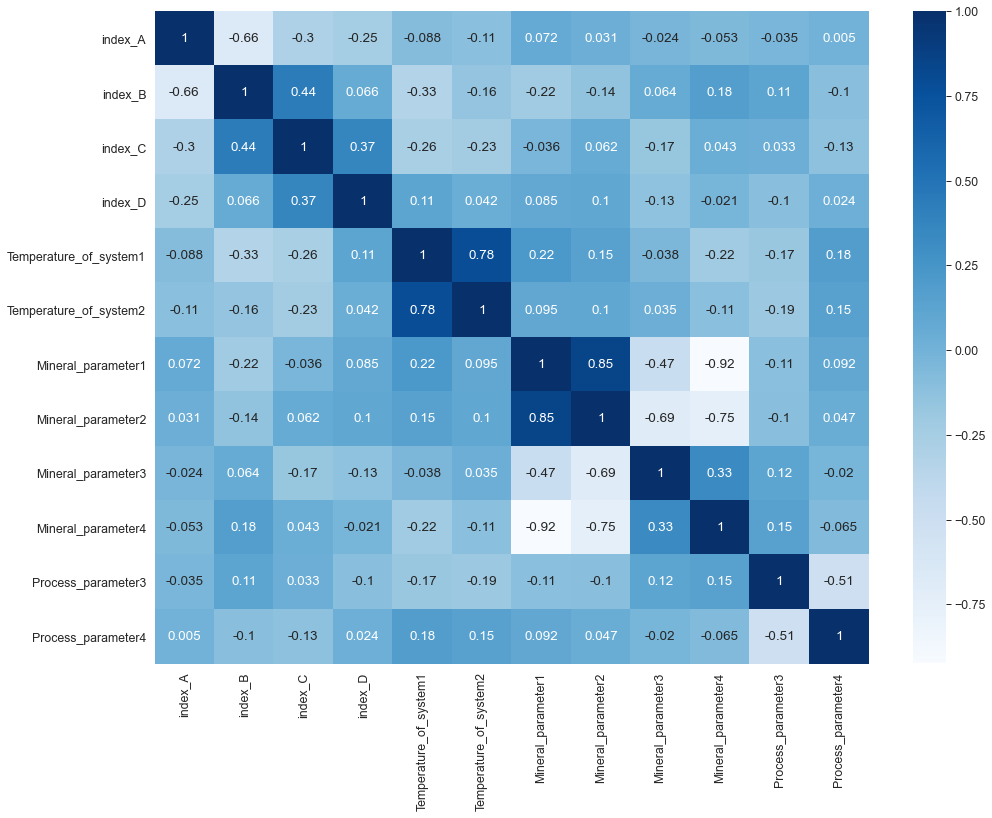

In [6]:
import numpy as np
df = pd.DataFrame(date)
corr = df.corr()
plt.figure(figsize=(16,12))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(corr, cmap='Blues', annot=True)

```
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate dataset
X, y = make_regression(n_samples=25000, n_features=3, n_targets=2, random_state=33)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

# Create the SVR regressor
svr = SVR(epsilon=0.2)

# Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)

# Train the regressor
mor = mor.fit(X_train, y_train)

# Generate predictions for testing data
y_pred = mor.predict(X_test)

# Evaluate the regressor
mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
```


In [7]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

import xgboost  as xgb

# Generate dataset
# X, y = make_regression(n_samples=25000, n_features=3, n_targets=2, random_state=33)
name_X = ["Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4","Process_parameter3","Process_parameter4"]
name_y = ["index_A","index_B","index_C","index_D"]
# name_X = ["index_A","index_B","index_C","index_D",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
# name_y = ["Temperature_of_system1",	"Temperature_of_system2"]
name = ["index_A","index_B","index_C","index_D","Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
X = date[name_X]
y = date[name_y]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Create the SVR regressor
# svr = SVR(epsilon=0.01,C=1.0,kernel='poly')
# svr = SVR(epsilon=0.2,kernel='rbf')
# svr = RandomForestRegressor(max_depth=2, random_state=0)
# # svr = ExtraTreesRegressor(n_estimators=100, random_state=0)
# other_params = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
# svr = xgb.XGBRegressor(objective='reg:squarederror',**other_params)

# params = {
#     'iterations':330,
#     'learning_rate':0.1,
#     'depth':10,
#     'loss_function':'RMSE'

# }


# svr = CatBoostRegressor(**params)


# Create the Multioutput Regressor
# mor = MultiOutputRegressor(svr)


# svr1 = SVR(epsilon=0.2,kernel='rbf')
other_params = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
svr2 = xgb.XGBRegressor(objective='reg:squarederror',**other_params)
# svr3 = ExtraTreesRegressor(n_estimators=400, random_state=0)
# kernel = DotProduct() + WhiteKernel()
# svr4 = GaussianProcessRegressor(kernel=kernel,random_state=0)
params = {
    'iterations':300,
    'learning_rate':0.1,
    'depth':10,
    'loss_function':'RMSE'

}


svr4 = CatBoostRegressor(**params)

# models = list()
# models.append(('xg', MultiOutputRegressor(svr2)))
# models.append(('svr', MultiOutputRegressor(svr1)))
# models.append(('RFR', MultiOutputRegressor(svr3)))

models = list()
models.append(('xg', svr2))
# models.append(('svr', svr1))
# models.append(('RFR', svr3))
models.append(('CATBOOST', svr4))
    # define the voting ensemble
svr = VotingRegressor(estimators=models)

mor = MultiOutputRegressor(svr)


# # Train the regressor
mor = mor.fit(X_train, y_train)




0:	learn: 0.9027724	total: 167ms	remaining: 50s
1:	learn: 0.8857041	total: 189ms	remaining: 28.2s
2:	learn: 0.8707392	total: 211ms	remaining: 20.9s
3:	learn: 0.8559111	total: 231ms	remaining: 17.1s
4:	learn: 0.8394876	total: 247ms	remaining: 14.6s
5:	learn: 0.8263451	total: 262ms	remaining: 12.8s
6:	learn: 0.8156749	total: 276ms	remaining: 11.5s
7:	learn: 0.8066221	total: 287ms	remaining: 10.5s
8:	learn: 0.7957522	total: 298ms	remaining: 9.63s
9:	learn: 0.7794513	total: 310ms	remaining: 9s
10:	learn: 0.7689725	total: 324ms	remaining: 8.52s
11:	learn: 0.7583217	total: 336ms	remaining: 8.06s
12:	learn: 0.7469247	total: 347ms	remaining: 7.67s
13:	learn: 0.7363856	total: 361ms	remaining: 7.38s
14:	learn: 0.7295647	total: 377ms	remaining: 7.17s
15:	learn: 0.7178457	total: 394ms	remaining: 6.99s
16:	learn: 0.7097848	total: 410ms	remaining: 6.83s
17:	learn: 0.7018915	total: 426ms	remaining: 6.67s
18:	learn: 0.6946985	total: 441ms	remaining: 6.52s
19:	learn: 0.6868309	total: 458ms	remaining: 6

In [ ]:
# Generate predictions for testing data
y_pred = mor.predict(X_test)
# Evaluate the regressor
y_test = y_test.values
# y_test
mse1 = mean_squared_error(y_test[:,0], y_pred[:,0])
mse2 = mean_squared_error(y_test[:,1], y_pred[:,1])
mse3 = mean_squared_error(y_test[:,2], y_pred[:,2])
mse4 = mean_squared_error(y_test[:,3], y_pred[:,3])
# print(f'MSE for first regressor: {mse_one} -second regressor: {mse_two}')
print("MSE:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))

mse1 = mean_absolute_error(y_test[:,0], y_pred[:,0])
mse2 = mean_absolute_error(y_test[:,1], y_pred[:,1])
mse3 = mean_absolute_error(y_test[:,2], y_pred[:,2])
mse4 = mean_absolute_error(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("MAE:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))

mse1 = explained_variance_score(y_test[:,0], y_pred[:,0])
mse2 = explained_variance_score(y_test[:,1], y_pred[:,1])
mse3 = explained_variance_score(y_test[:,2], y_pred[:,2])
mse4 = explained_variance_score(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("可解释的方差分数:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))


mse1 = r2_score(y_test[:,0], y_pred[:,0])
mse2 = r2_score(y_test[:,1], y_pred[:,1])
mse3 = r2_score(y_test[:,2], y_pred[:,2])
mse4 = r2_score(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("r2_score:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))

mse1 = mean_absolute_percentage_error(y_test[:,0], y_pred[:,0])
mse2 = mean_absolute_percentage_error(y_test[:,1], y_pred[:,1])
mse3 = mean_absolute_percentage_error(y_test[:,2], y_pred[:,2])
mse4 = mean_absolute_percentage_error(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("mean_absolute_percentage_error:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))

MSE:
1  0.4723346929506919
2  0.8289606288947904
3  0.28831513595446234
4  2.0489838374249176
MAE:
1  0.5055064155858265
2  0.6568059898649369
3  0.4135665874203815
4  0.9580151293228684
可解释的方差分数:
1  0.4778962771998032
2  0.5393486523104958
3  0.8121783178100314
4  0.8039681153773822
r2_score:
1  0.4700354613730384
2  0.5362651784982123
3  0.8108728729727801
4  0.803788072638778
mean_absolute_percentage_error:
1  0.006383776911476698
2  0.027776726419015237
3  0.037487449788125876
4  0.06517875501938798


In [ ]:
y_pred

array([[79.10238439, 23.53131854, 10.84906526, 11.81289273],
       [78.15687691, 24.28452319, 11.13914712, 22.52460576],
       [78.89772924, 24.46402818, 11.14143577, 12.67375379],
       ...,
       [79.18291998, 24.65843098, 10.50359605, 15.70681486],
       [79.01325949, 23.00443084,  8.56137563, 11.08651401],
       [78.7674884 , 25.45722689, 11.1482952 , 14.59279145]])

In [ ]:
pr = pd.read_excel("preid.xlsx")
pr

Time  index_A  index_B  index_C  index_D  Temperature_of_system1  \
0  2022-02-08      NaN      NaN      NaN      NaN                  341.40   
1  2022-02-08      NaN      NaN      NaN      NaN                  341.40   
2  2022-02-08      NaN      NaN      NaN      NaN                  341.40   
3  2022-02-08      NaN      NaN      NaN      NaN                  341.40   
4  2022-02-08      NaN      NaN      NaN      NaN                  341.40   
5  2022-02-08      NaN      NaN      NaN      NaN                  341.40   
6  2022-02-08      NaN      NaN      NaN      NaN                  341.40   
7  2022-02-08      NaN      NaN      NaN      NaN                  341.40   
8  2022-02-09      NaN      NaN      NaN      NaN                 1010.32   
9  2022-02-09      NaN      NaN      NaN      NaN                 1010.32   
10 2022-02-09      NaN      NaN      NaN      NaN                 1010.32   
11 2022-02-09      NaN      NaN      NaN      NaN                 1010.32   
12 2022-02-09      NaN      NaN      NaN      NaN                 1010.32   
13 2022-02-09      NaN      NaN      NaN      NaN                 1010.32   
14 2022-02-09      NaN      NaN      NaN      NaN                 1010.32   
15 2022-02-09      NaN      NaN      NaN      NaN                 1010.32   

    Temperature_of_system2  Mineral_parameter1  Mineral_parameter2  \
0                   665.04               52.88               91.27   
1                   665.04               52.88               91.27   
2                   665.04               52.88               91.27   
3                   665.04               52.88               91.27   
4                   665.04               52.88               91.27   
5                   665.04               52.88               91.27   
6                   665.04               52.88               91.27   
7                   665.04               52.88               91.27   
8                   874.47               54.44               92.12   
9                   874.47               54.44               92.12   
10                  874.47               54.44               92.12   
11                  874.47               54.44               92.12   
12                  874.47               54.44               92.12   
13                  874.47               54.44               92.12   
14                  874.47               54.44               92.12   
15                  874.47               54.44               92.12   

    Mineral_parameter3  Mineral_parameter4  Process_parameter1  \
0                47.22               22.26                1.25   
1                47.22               22.26                1.25   
2                47.22               22.26                1.25   
3                47.22               22.26                1.25   
4                47.22               22.26                1.25   
5                47.22               22.26                1.25   
6                47.22               22.26                1.25   
7                47.22               22.26                1.25   
8                48.85               21.83                1.25   
9                48.85               21.83                1.25   
10               48.85               21.83                1.25   
11               48.85               21.83                1.25   
12               48.85               21.83                1.25   
13               48.85               21.83                1.25   
14               48.85               21.83                1.25   
15               48.85               21.83                1.25   

    Process_parameter2  Process_parameter3  Process_parameter4  
0                 3.09              319.02              151.29  
1                 3.09              333.77              145.94  
2                 3.09              331.19              138.85  
3                 3.09              307.62              136.84  
4                 3.09              292.61              152.

In [ ]:
pt_val = mor.predict(pr[name_X])
pt_val

array([[79.47439711, 24.27770824, 11.71189039, 15.03433334],
       [79.22777676, 24.66348463, 11.54171116, 14.4551339 ],
       [78.95797952, 24.76847917, 11.61367525, 15.92299974],
       [79.12681098, 24.0363533 , 11.45236372, 16.96087889],
       [79.72956477, 24.28899566, 11.39415784, 15.45609367],
       [78.88882351, 24.04703547, 11.81438415, 17.70026795],
       [78.83036817, 24.74563454, 11.80285874, 17.83484488],
       [79.2012836 , 23.91116521, 11.40659266, 16.39372428],
       [78.98294226, 24.41137266, 11.82464274, 15.41203913],
       [79.11967191, 24.29373734, 11.69533041, 14.93372384],
       [78.80457089, 24.49413731, 11.31602636, 14.74050283],
       [79.30815878, 24.19679527, 11.54582875, 14.22787834],
       [79.13364343, 24.01063086, 11.4344021 , 13.84025854],
       [79.2129765 , 24.26539687, 11.57100003, 14.7542066 ],
       [78.9194657 , 24.33188684, 11.49379293, 15.40727007],
       [78.9661081 , 24.07773893, 11.52274753, 15.92187465]])